In [2]:
import pandas as pd
from numpy import *

data = pd.read_csv('data4.csv')

x_data = data['theta']
y_data = data['I']
y_error = data['s_I']
N = len(data)

display(data)

,theta,I,s_I
0,-90,0.13,0.1
1,-85,23.30,0.5
2,-80,81.00,1.0
3,-75,190.00,2.0
4,-70,339.00,5.0
5,-65,505.00,5.0
6,-60,680.00,5.0
7,-55,870.00,10.0
8,-50,1060.00,10.0
9,-45,1330.00,20.0


In [3]:
#print(data.to_latex())

In [4]:
from numpy import *
from scipy.optimize import curve_fit

def I_model(theta,I0,theta0):
    return I0*cos(theta*pi/180 + theta0*pi/180)**2

I00, theta00 = 2656, 0.1
init_values = [I00, theta00]
fit, covariance = curve_fit(I_model, x_data, y_data,
                            p0 = init_values,
                            absolute_sigma = True,
                            sigma = y_error)

nu = N - 2

std_dev = sqrt(diag(covariance))
residuals = y_data - I_model(x_data,fit[0],fit[1])
std_error = sqrt(diag(covariance)*sum(residuals**2)/nu)


print('results: ', fit)
print('standar deviations: ', std_dev)
print('standar error: ', std_error)


results:  [2.55347112e+03 6.41441523e-01]
standar deviations:  [5.90633251 0.02433176]
standar error:  [101.328215     0.41743226]


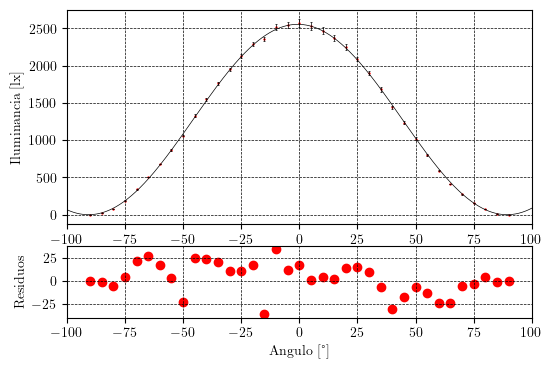

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import rc
#Plotting
xmin = x_data[0] - 10
xmax = x_data[N-1]+(x_data[N-1] - x_data[N-2])*2
xfit = linspace(xmin,xmax,1000)
yfit = I_model(xfit,fit[0],fit[1])
fig = plt.figure(1, figsize = (6,4))
gs = gridspec.GridSpec(2, 1, height_ratios = [6,2],
                       hspace= 0.15)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
def plotStyle():
    plt.grid(b = True, ls = '--',
            lw = 0.5, c = 'k')
    plt.xlim(xmin,xmax)
 
#Subplot: fitted function
ax1 = fig.add_subplot(gs[0])
ax1.set_ylabel('Iluminancia [lx]')
ax1.scatter(x_data,y_data,c = 'r',s = 0.5)
ax1.errorbar(x_data,y_data, ls = 'none',
             c = 'k',
             yerr = y_error,
             elinewidth= 0.5,
             capsize = 1,
             capthick = 0.5)
ax1.plot(xfit,yfit,lw = 0.5,
             c = 'k')
#ax1.set_xticklabels([])
plotStyle()

#Subplot: Residuals
ax2 = fig.add_subplot(gs[1])
ax2.scatter(x_data,residuals,c = 'r')
ax2.set_xlabel('Angulo [°]')
ax2.set_ylabel('Residuos')
plotStyle()
plt.savefig('plot3.eps')
plt.show()